### Langevin Equation

Equation (1)
$$ \gamma \dot{x_1} = -V^\prime _1 (x_1) - k_1 x_2 + \sqrt{2k_B T_1 \gamma}ξ_1 $$
$$ \gamma \dot{x_2} = -V^\prime _2 (x_2) - k_2 x_1 + \sqrt{2k_B T_2 \gamma}ξ_2 $$

$$ V_1 (x_1) = \frac{a_1}{2} x_1^2, V_2 (x_2) = \frac{a_2}{2} x_2^2 $$

Equation (2)

$$ \dot{x_1} = -\frac{a_1}{\gamma} x_1 - \frac{k_1}{\gamma} x_2 + \sqrt{\frac{2k_B T_1}{\gamma}}ξ_1 $$
$$ \dot{x_2} = -\frac{a_2}{\gamma} x_2 - \frac{k_2}{\gamma} x_1 + \sqrt{\frac{2k_B T_2}{\gamma}}ξ_2 $$

### Stochastic Heat:

$$ 0 = - \gamma \dot{x_1} + \sqrt{2k_B T_1 \gamma}ξ_1 - V^\prime _1 (x_1) - k_1 x_2  $$
$$ 0 = - \gamma \dot{x_2} + \sqrt{2k_B T_2 \gamma}ξ_2 - V^\prime _2 (x_2) - k_2 x_1  $$

For x_1:

$$ \delta Q_1 = (-\gamma \dot{x_1} + \sqrt{2k_B T_1 \gamma}ξ_1) \circ dx_1  = (V^\prime _1 (x_1) + k_1 x_2) \circ dx_1$$

$$ \delta Q_1 = (a_1 x_1 + k_1 x_2) \circ dx_1  $$

For x_2:

$$ \delta Q_2 = (-\gamma \dot{x_2} + \sqrt{2k_B T_2 \gamma}ξ_2) \circ dx_2  = (V^\prime _2 (x_2) + k_2 x_1) \circ dx_2$$

$$ \delta Q_2 = (a_2 x_2 + k_2 x_1) \circ dx_2  $$

### Functions for euler method

Euler Scheme

$$ X_{t+\Delta t} = X_t + f(X_t, t)\Delta t + g(X_t,t)\Delta B_t $$

where $$ \Delta B_t = \mathcal{N}(0, \sqrt\Delta t) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, det
from matplotlib import cm 
# from tqdm import tqdm

In [2]:
def euler_one_traj(n_time, pars):   
    #initial condition
    x1 = 0
    x2 = 0
    x1_traj = []
    x2_traj = []
    
    #performing 1 traj with n_time number of data points
    for i in range(n_time):
        #generate delta_B
        s1 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        s2 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        #solve for x1, x2
        x1_new = x1 - (pars['a1']/pars['gamma'])*x1*pars['delta_t'] - \
        (pars['k1']/pars['gamma'])*x2*pars['delta_t'] + \
        np.sqrt((2*pars['Kb']*pars['T1'])/pars['gamma'])*s1
                 
        x2_new = x2 - (pars['a2']/pars['gamma'])*x2*pars['delta_t'] - \
        (pars['k2']/pars['gamma'])*x1*pars['delta_t'] + \
        np.sqrt((2*pars['Kb']*pars['T2'])/pars['gamma'])*s2
                
        x1 = x1_new
        x2 = x2_new
        
        x1_traj.append(x1)
        x2_traj.append(x2)
    return x1_traj, x2_traj

In [3]:
def euler_n_traj(max_time, pars):
    min_time = 0
    n_time = int((max_time - min_time)/pars['delta_t'] + 1) #n_time = num of evenly spaced samples (ex. 1001 points)
    time = np.linspace(min_time, max_time, n_time) #time(ex. 0 (min time), 0.01, 0.02, ..., 10 (max time)) with n_time no. of data points
    
    x1_traj_list = []
    x2_traj_list = []
    for i in range(pars['n_realizations']):
        x1_traj, x2_traj = euler_one_traj(n_time, pars)
        x1_traj_list.append(x1_traj)
        x2_traj_list.append(x2_traj)
        
    return x1_traj_list, x2_traj_list, time

In [4]:
#plot trajectories
def plotter_traj(x1_traj_list, x2_traj_list):
    fig, ax = plt.subplots(1, 3, figsize=(15,3))

    for x1 in x1_traj_list:
        ax[0].plot(time, x1)
    for x2 in x2_traj_list:
        ax[1].plot(time, x2)
    for x1,x2 in zip(x1_traj_list, x2_traj_list):
        ax[2].plot(x1,x2)

    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x1')

    ax[1].set_xlabel('t')
    ax[1].set_ylabel('x2')

    ax[2].set_xlabel('x1')
    ax[2].set_ylabel('x2')

    plt.tight_layout()
    plt.show()

In [5]:
def obtain_last_element_traj(x1_traj_list, x2_traj_list):
    """Obtains the last element of the trajectory from euler_n_traj function:
    
    Input:
    x1_traj_list(nested list) = x1 trajectory
    x2_traj_list(nested list) = x2 trajectory
    
    As an example:
    x1_traj_list = [[1,2,3], [4,5,6], [7,8,9]]
    Each smaller list of the bigger list contains the trajectory from 1 realization,
    so if n_realizations = 3, the number of smaller lists = 3
    
    Then x1_list = [3,6,9]
    
    Returns:
    x1_list, x2_list (last element of each smaller list)"""
    #obtain the last element of x1_traj_list
    x1_list = []
    for x1 in x1_traj_list:
        last_elementx1 = x1[-1]
        x1_list.append(last_elementx1)

    #obtain the last element of x2_traj_list
    x2_list = []
    for x2 in x2_traj_list:
        last_elementx2 = x2[-1]
        x2_list.append(last_elementx2)
        
    return x1_list, x2_list

In [6]:
#plot histogram from last element of x1 traj and x2 traj
def plotter_histogram(x1_list, x2_list, pars):
    
    mean_x1 = np.mean(x1_list)
    std_x1 = np.std(x1_list)
    mean_x2 = np.mean(x2_list)
    std_x2 = np.std(x2_list)


    plt.figure(figsize=(10,4))
    plt.hist(x1_list, histtype='step', density = True, bins = 30, label='x1')
    plt.hist(x2_list, histtype='step', density = True, bins = 30, label='x2')
    plt.title('x1: Mean: {:.3g} and Std Dev: {:.3g} \n x2: Mean: {:.3g} and Std Dev: {:.3g}'.format(mean_x1, std_x1, mean_x2, std_x2))
    
    plt.suptitle('T1: {}, T2: {}'.format(pars['T1'], pars['T2']))
    plt.xlabel('x1')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Analytical solution

In [7]:
def calculate_cov_matrix(pars):
    denominator = (pars['a1'] + (pars['a2']*(pars['gamma']/pars['gamma']))) * ((pars['k1']*pars['k2']) - (pars['a1']*pars['a2']))

    element_00 = (pars['T2']*(pars['k1']**2)) - (pars['T1']*pars['k1']*pars['k2']) + (pars['T1']*pars['a2']*(pars['a1'] + (pars['a2']*(pars['gamma']/pars['gamma']))))

    element_11 = (pars['T1']*(pars['k2']**2)*(pars['gamma']/pars['gamma'])) - (pars['T2']*pars['k1']*pars['k2'])*(pars['gamma']/pars['gamma']) + (pars['T2']*pars['a1']*(pars['a1'] + (pars['a2']*(pars['gamma']/pars['gamma']))))

    element_01 = -pars['T2']*pars['a1']*pars['k1'] - pars['T1']*pars['a2']*(pars['k2']*(pars['gamma']/pars['gamma']))

    #solving cov matrix
    cov_matrix = pars['Kb']*(np.array([[-element_00/denominator, -element_01/denominator], [-element_01/denominator, -element_11/denominator]]))
    cov_matrix_new = cov_matrix / (1e-20)
    cov_matrix_inverse = inv(cov_matrix_new)
    cov_matrix_det = det(cov_matrix_new)
    
    return cov_matrix_new, cov_matrix_inverse, cov_matrix_det

def analytical_soln(start, end, pars):
    prob_list = []
    
    x1 = np.linspace(start, end, 100) / (1e-10)
    x2 = np.linspace(start, end, 100) / (1e-10)
    
    meshx, meshy = np.meshgrid(x1, x2)
    
    cov_matrix, cov_matrix_inverse, cov_matrix_det = calculate_cov_matrix(pars)
    
    for x1_, x2_ in zip(meshx.flatten(), meshy.flatten()):
        x_vector = np.array([[x1_,x2_]]).T  
        exponent = -1/2*(x_vector.T @ cov_matrix_inverse @ x_vector)
        final_exp = np.exp(exponent[0][0])
        prob = final_exp / np.sqrt(cov_matrix_det*((2*np.pi)**2))
        prob_list.append(prob)
    return prob_list, meshx, meshy

In [8]:
#paramaters
pars = {}
pars['a1'] = 1
pars['k1'] = 0.5
pars['T1'] = 100
pars['a2'] = 1
pars['k2'] = 0.5
pars['T2'] = 600

pars['gamma'] = 1
pars['delta_t'] = 0.01
pars['Kb'] = 1.380649*10**-23

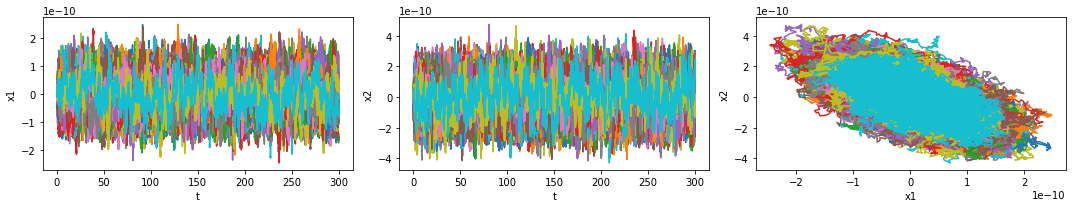

Wall time: 1min 10s


In [9]:
%%time

#plot trajectories with t = 10s
pars['n_realizations'] = 100
x1_traj_list, x2_traj_list, time = euler_n_traj(300, pars)
plotter_traj(x1_traj_list, x2_traj_list)

Plotting T1 = T2

{'a1': 1, 'k1': 0.5, 'T1': 100, 'a2': 1, 'k2': 0.5, 'T2': 600, 'gamma': 1, 'delta_t': 0.01, 'Kb': 1.380649e-23, 'n_realizations': 1000}


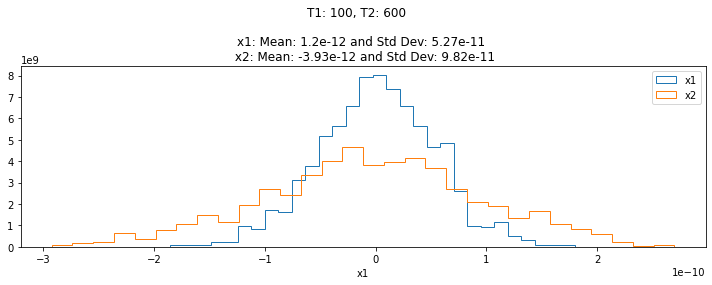

Wall time: 11min 18s


In [10]:
%%time

#plot histogram with t = 1s
pars['T1'] = 100
pars['T2'] = 600
pars['n_realizations'] = 1000
print(pars)
x1_traj_list_eq, x2_traj_list_eq, time = euler_n_traj(300, pars)
x1_list_eq, x2_list_eq = obtain_last_element_traj(x1_traj_list_eq, x2_traj_list_eq)
plotter_histogram(x1_list_eq, x2_list_eq, pars)

In [11]:
hist_eq, binsx1_eq, binsx2_eq = np.histogram2d(x1_list_eq, x2_list_eq, bins = 18)
print(pars)

{'a1': 1, 'k1': 0.5, 'T1': 100, 'a2': 1, 'k2': 0.5, 'T2': 600, 'gamma': 1, 'delta_t': 0.01, 'Kb': 1.380649e-23, 'n_realizations': 1000}


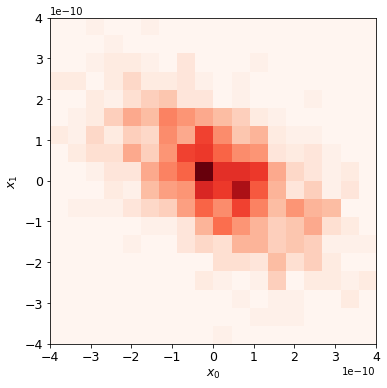

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.imshow(hist_eq, extent=[-4*10**-10, 4*10**-10, -4*10**-10, 4*10**-10], cmap=plt.cm.Reds, aspect='auto', origin='lower')
ax.set_aspect('equal')
# fig.colorbar(cm.ScalarMappable(cmap=plt.cm.Reds), ax=ax)
plt.xlabel('$x_0$', fontsize=12.5)
plt.ylabel('$x_1$', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
fig.savefig('joint_num_neq.png', dpi=300)
plt.show()

In [13]:
pars['T1'] = 100
pars['T2'] = 600
print(pars)
analytical_eq, x1_eq, x2_eq = analytical_soln(-4*10**-10, 4*10**-10, pars)
pdf_eq = np.array(analytical_eq).reshape(100,100)

{'a1': 1, 'k1': 0.5, 'T1': 100, 'a2': 1, 'k2': 0.5, 'T2': 600, 'gamma': 1, 'delta_t': 0.01, 'Kb': 1.380649e-23, 'n_realizations': 1000}


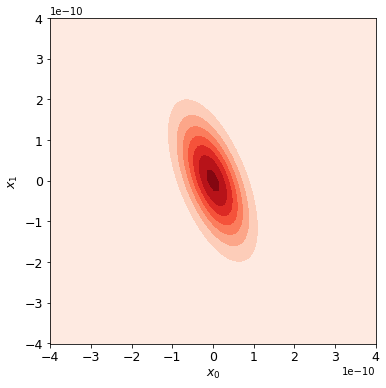

In [20]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.contourf(pdf_eq, extent=[-4.05*10**-10, 4.05*10**-10, -4.05*10**-10, 4.05*10**-10], cmap=plt.cm.Reds, origin='lower')
ax.set_aspect('equal')
# fig.colorbar(cm.ScalarMappable(cmap=plt.cm.Reds), ax=ax)
plt.xlabel('$x_0$', fontsize=12.5)
plt.ylabel('$x_1$', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
fig.savefig('joint_analyt_neq.png', dpi=300)
plt.show()

### Sanity check if simulation and theory agrees

In [15]:
def calculate_cov_matrix(pars):
    denominator = (pars['a1'] + (pars['a2']*(pars['gamma']/pars['gamma']))) * ((pars['k1']*pars['k2']) - (pars['a1']*pars['a2']))

    element_00 = (pars['T2']*(pars['k1']**2)) - (pars['T1']*pars['k1']*pars['k2']) + (pars['T1']*pars['a2']*(pars['a1'] + (pars['a2']*(pars['gamma']/pars['gamma']))))

    element_11 = (pars['T1']*(pars['k2']**2)*(pars['gamma']/pars['gamma'])) - (pars['T2']*pars['k1']*pars['k2'])*(pars['gamma']/pars['gamma']) + (pars['T2']*pars['a1']*(pars['a1'] + (pars['a2']*(pars['gamma']/pars['gamma']))))

    element_01 = -pars['T2']*pars['a1']*pars['k1'] - pars['T1']*pars['a2']*(pars['k2']*(pars['gamma']/pars['gamma']))

    #solving cov matrix
    cov_matrix = pars['Kb']*(np.array([[-element_00/denominator, -element_01/denominator], [-element_01/denominator, -element_11/denominator]]))
    cov_matrix_new = cov_matrix / (1e-20)
    cov_matrix_inverse = inv(cov_matrix_new)
    cov_matrix_det = det(cov_matrix_new)
    
    return cov_matrix_new, cov_matrix_inverse, cov_matrix_det

def analytical_soln_sanitycheck(x1_numerical, x2_numerical, pars):
    prob_list = []
    
    rescaled_x1 = x1_numerical / (1e-10)
    rescaled_x2 = x2_numerical / (1e-10)
    
    x1_num_shift = np.roll(rescaled_x1, shift = 1)
    x2_num_shift = np.roll(rescaled_x2, shift = 1)
    
    midpoint_x1 = (rescaled_x1 + x1_num_shift)/2
    final_midpoint_x1 = midpoint_x1[1:]
    
    delta_x1 = rescaled_x1[1] - rescaled_x1[0]

    midpoint_x2 = (rescaled_x2 + x2_num_shift)/2
    final_midpoint_x2 = midpoint_x2[1:]
    
    delta_x2 = rescaled_x2[1] - rescaled_x2[0]
    
    meshx, meshy = np.meshgrid(final_midpoint_x1, final_midpoint_x2)
    
    cov_matrix, cov_matrix_inverse, cov_matrix_det = calculate_cov_matrix(pars)
    
    for (x1_, x2_) in zip(meshx.flatten(), meshy.flatten()):
        x_vector = np.array([[x1_,x2_]]).T  
        exponent = -1/2*(x_vector.T @ cov_matrix_inverse @ x_vector)
        final_exp = np.exp(exponent[0][0])
        prob = final_exp / np.sqrt(cov_matrix_det*((2*np.pi)**2))
        p_th = prob*delta_x1*delta_x2
        prob_list.append(p_th)
    return prob_list

Plot

In [16]:
pars['T1'] = 100
pars['T2'] = 600
p_th = analytical_soln_sanitycheck(binsx1_eq, binsx2_eq, pars)

In [17]:
pars

{'a1': 1,
 'k1': 0.5,
 'T1': 100,
 'a2': 1,
 'k2': 0.5,
 'T2': 600,
 'gamma': 1,
 'delta_t': 0.01,
 'Kb': 1.380649e-23,
 'n_realizations': 1000}

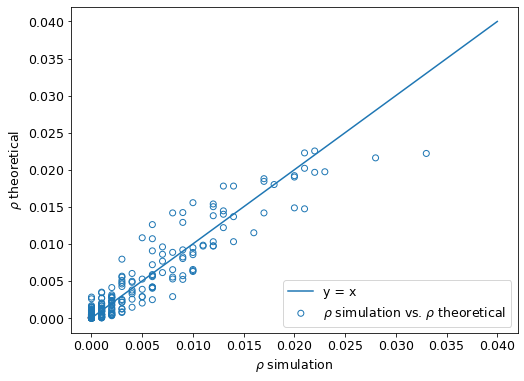

In [25]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.scatter(hist_eq.flatten('F')/1000, p_th, label='$\\rho$ simulation vs. $\\rho$ theoretical', facecolors='none', \
            edgecolors='tab:blue')

x = np.linspace(0, 0.04, 100)
y = 1*x

plt.plot(x,y, label = 'y = x')

plt.xlabel('$\\rho$ simulation', fontsize=12.5)
plt.ylabel('$\\rho$ theoretical', fontsize=12.5)

plt.legend(loc='lower right', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.savefig('sanitycheck_joint_neq.png', dpi=300)
plt.show()